# Exercise 4: Introduction to Regression

Aufgaben:

* Programmierung OLS, 
* Programmierung Diagnostics: Bootstrap CI, R²
* Generierung Zufallsdaten nach Muster, Check Funktionalität, Plot daten und Regreesionsgerade
* Datensatz Student Performance (Preprocessing [!], Übergang zu statsmodels
* Exeriments Predictors
* Analyse Prediktoren
* Residual Plots


In [9]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

## A Brief Introduction to Statsmodels

Next to sklearn, statsmodels is probably the most popular Python package for regression. While the focus of sklearn (will be covered later in class) rather lies machine learning applications, statsmodels (as the name suggests) has a rather statitics-oriented focus. We will briefly present the basic functionality of its regression functions by revisiting the Iris data set.

In [10]:
# read in data
df = pd.read_csv ("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#### Example 1: Bivariate Prediction
We want to fit a regession model that estimates sepal length from sepal width.

In [11]:
# specify predictors X and target Y
Y = df.sepal_length
X = df.sepal_width
# most importantly: we have to add a constant term to estimate the intercept
X = sm.add_constant(X)
X[:10]

/Users/hhk/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


,const,sepal_width
0,1.0,3.5
1,1.0,3.0
2,1.0,3.2
3,1.0,3.1
4,1.0,3.6
5,1.0,3.9
6,1.0,3.4
7,1.0,3.4
8,1.0,2.9
9,1.0,3.1


In [13]:
# initialize model: OLS = ordinary least squares
model = sm.OLS(Y,X)
# fit model: only now te model, i.e. the parameters are computed
results = model.fit()

# print a summary, i.e. an overview on parameters and diagnostics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.792
Date:                Thu, 07 Nov 2019   Prob (F-statistic):              0.183
Time:                        17:54:59   Log-Likelihood:                -183.14
No. Observations:                 150   AIC:                             370.3
Df Residuals:                     148   BIC:                             376.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           6.4812      0.481     13.466      0.000       5.530       7.432
sepal_width    -0.2089      0.156     -1.339      0.183      -0.517       0.099
==============================================================================
Omnibus:                        4.455   Durbin-Watson:                   0.941
Prob(Omnibus):                  0.108   Jarque-Bera (JB):                4.252
Skew:                           0.356   Prob(JB):                        0.119
Kurtosis:                       2.585   Cond. No.                         24.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
# get parameters of model, i.e. beta_0 and beta_1
params = results.params
params

const          6.481223
sepal_width   -0.208870
dtype: float64

In [ ]:
# we can apply parameters to obtain the predictions of Y based on X
np.dot(X,params)

In [ ]:
# unsurprisingly, statsmodels also provides a direct prediction function:
results.predict(X)

#### Example 2: Multivariate Regression
Now we want to include all other numerical columns from the data to fit to estimate sepal length.

In [42]:
# statsmodels also provides a formula syntax, which requires an additional import
from statsmodels.formula.api import ols

# formula syntax: dependent variable ~ predictor1 + predictor2 +.....
# note that intercept is fit automatically
model = ols("sepal_length ~ sepal_width + petal_width + petal_length", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     297.0
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           6.28e-62
Time:                        10:12:28   Log-Likelihood:                -37.000
No. Observations:                 150   AIC:                             82.00
Df Residuals:                     146   BIC:                             94.04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.8451      0.250      7.368      0.000       1.350       2.340
sepal_width      0.6549      0.067      9.823      0.000       0.523       0.787
petal_width     -0.5626      0.127     -4.426      0.000      -0.814      -0.311
petal_length     0.7111      0.057     12.560      0.000       0.599       0.823
==============================================================================
Omnibus:                        0.265   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.432
Skew:                           0.003   Prob(JB):                        0.806
Kurtosis:                       2.737   Cond. No.                         54.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
# formula syntax: dependent variable ~ predictor1 + predictor2 +.....
# note that intercept is fit automatically

# add interaction and squared term
model = ols("sepal_length ~ sepal_width:petal_width + np.square(petal_length) + sepal_width + petal_width + petal_length", data=df)

results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           sepal_length   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     186.9
Date:                Thu, 31 Oct 2019   Prob (F-statistic):           4.20e-61
Time:                        10:16:02   Log-Likelihood:                -33.031
No. Observations:                 150   AIC:                             78.06
Df Residuals:                     144   BIC:                             96.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   2.0983      0.476      4.408      0.000       1.157       3.039
sepal_width:petal_width    -0.1255      0.100     -1.250      0.213      -0.324       0.073
np.square(petal_length)     0.0333      0.013      2.571      0.011       0.008       0.059
sepal_width                 0.6790      0.123      5.541      0.000       0.437       0.921
petal_width                -0.1154      0.344     -0.335      0.738      -0.796       0.565
petal_length                0.4470      0.117      3.821      0.000       0.216       0.678
==============================================================================
Omnibus:                        0.119   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.942   Jarque-Bera (JB):                0.276
Skew:                           0.021   Prob(JB):                        0.871
Kurtosis:                       2.794   Cond. No.                         483.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Task 1: Fitting an artificial data set

We want to implement OLS regression and test it on artificial data. Thus, in this task you may not yet use the statsmodels functions (except for checking results).

#### a) Creating artificial data
Create an artificial dataset which consists of:
* a vector $x$ consisting of 100 (float) values between 0 and 1
* a vector $y = 10x +\varepsilon$, in which for each element, the error $\varepsilon_i$ is drawn from the standard normal distribution.
Create a scatterplot of x against y!

[-0.2806968   0.85644284 -0.13996351 -0.16077434  1.46420113 -0.34373081
  1.13562799 -1.25988352  2.32788702  2.35059923  0.60832687  3.01003147
  1.17759161  3.22356122  2.32061993  1.39800174  0.39503254  0.90989027
  0.15871341  2.21389405  1.64872314  0.7842687   2.56454891  1.2406135
  2.99243051  2.51432471  2.12474373  4.02347229  2.65998085  3.05386063
  2.52474427  3.56055795  3.52990333  4.14495612  3.43446118  3.75436067
  1.90491829  3.26297992  4.43546378  3.20584776  2.76938243  4.65842151
  5.19013624  3.25215454  4.06691074  5.94717155  4.32589161  4.93097271
  4.92150931  4.70656622  7.14337256  3.14534216  7.79236961  6.25673465
  5.80839115  5.95002585  3.26279881  5.25932554  5.90115771  4.5117352
  6.15983326  6.26817187  6.21736732  4.00299534  4.49300868  5.36209739
  8.04859094  5.73481044  5.35904809  6.97038958  4.32812878  7.76778182
  6.20246843  9.02432529  7.72679846  7.87506642  6.95077226  7.13725046
  5.12149618  6.89924872  7.09772486  8.21130346  9.1

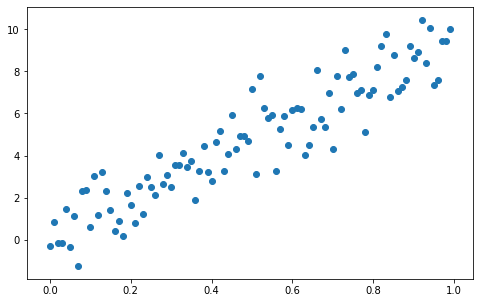

In [36]:
# X = np.random.rand(1,100)
X = np.arange(0,1,0.01)
epsilon = np.random.normal(0, 1, 100)
Y = 10*X + epsilon
print(Y)
plt.figure(figsize=(8, 5))
plt.scatter(X,Y)
plt.show()

#### b) Implementing OLS regression
Write a function that takes as input a numpy vector of target values $y$, and a matrix of predictors $X$, and returns the parameter vector $\beta$ resulting from OLS regression. Apply this function to fit a model on your artificial data, compute the predictions, and add the resulting regression line to the plot from a). Remember to add a constant term!

In [37]:
# initialize model: OLS = ordinary least squares
model = sm.OLS(Y,X)
# fit model: only now te model, i.e. the parameters are computed
results = model.fit()
h
# print a summary, i.e. an overview on parameters and diagnostics
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.961
Method:                 Least Squares   F-statistic:                              2483.
Date:                Thu, 31 Oct 2019   Prob (F-statistic):                    6.35e-72
Time:                        16:07:39   Log-Likelihood:                         -150.65
No. Observations:                 100   AIC:                                      303.3
Df Residuals:                      99   BIC:                                      305.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             9.5396      0.191     49.830      0.000       9.160       9.919
==============================================================================
Omnibus:                        0.271   Durbin-Watson:                   2.160
Prob(Omnibus):                  0.873   Jarque-Bera (JB):                0.449
Skew:                          -0.019   Prob(JB):                        0.799
Kurtosis:                       2.674   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### c) Diagnostics 1: The Bootstrap

Based on your regression function, write a function that again takes as input a predictor matrix $X$ and a target column $y$, plus a integer $N$, and bootstraps the data $N$ times to compute the 95% confidence interval for each parameter. Specifically, return one parameter vector for the bottom beta values, and one parameter vector for the top values. 
Apply this function to estimate the confidence intervals on our artificial data.

#### d) Diagnostics 2: The $R^2$ score.

Write a function that takes as input a ground truth vector y, its prediction y_hat, and computes the $R^2$ value of that prediction! Does your model explain most of the variance in the artificial data?

### Task 2: Predicting Student Performance

We revisit the student performance dataset from last week's exercise and aim to estimate the exam performance in math. In this task you may use statsmodels!

#### a) Data Preprocessing

Load the student performance data into a dataframe. Since we want to estimate students performance in math, separate this column from the dataframe. On the remaining columns, transform, i.e. dummy-code all categorical columns as explained in lecture. Further, check for collinearities. If a pair of highly correlated columns (i.e. pearson correlation > 0.9) is given, remove one of these columns from the predictors. Remember to add a constant term afterwards.

#### b) Learning a simple regression model

Apply statsmodels to estimate the exam performance in math from all other columns, without any column interactions. Remember to use a constant term, and properly transform categorical variables. Which significant effects do you observe?

#### c) Adding interactions
Apply statsmodels to fit a regression model that in addition to the previous model further considers an interaction term between the test preparation curse and each of the continuous columns that are left from the preprocessing. Thus, first add these columns to your predictor matrix, and then compute the corresponding model.
Does this interaction yield an improvement or rather cause problems?

#### d) Optimizing adjusted R^2

Implement a forward selection routine that takes as input a matrix $X$ of predictors, the index of the constant column in $X$, and a target vector $y$, and returns a submatrix of predictors that produces the optimal adjusted R^2 value, plus a vector of the corresponding column indices, the corresponding parameter vector beta, and the optimal adjusted R² value.
Apply this function on the predictor matrix from part c). Which predictors are left?

#### e) Checking residuals
Create a residual plot of your final model and give an interpretation of what you observe!